In [ ]:
# import MINST dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


4


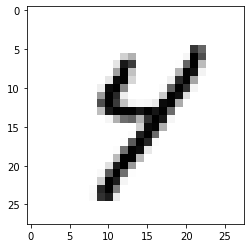

In [ ]:
import matplotlib.pyplot as plt

# create plots in same page
%matplotlib inline 

#  select a random number to display
# we can select anything up to 60,000 as the trainig data has 60,000 images
image_index = 7077 

print(y_train[image_index]) 

plt.imshow(x_train[image_index], cmap='Greys')

In order to train the CNN, we need to know the shape of the training dataset. 

The output: (60000, 28, 28) revelas two details about the dataset.
1. The number of image in the training set : which is 60,000
2. The size of the image in pixels (28 * 28)

In [ ]:

x_train.shape

(60000, 28, 28)

After going throguh the dataset, the below implementation will create a CNN for model building.

In a image classification problem, it is considered that the dependency between two pixels are only related with the adjacent and close pixels. Therefore a technique like CNN is suitable for image classification where it's convolution allows the model to preserve the relationship between different parts of an image.

In the convolution layer which is the first layer of the model, the features of the image is extracted. In that layer the pixels are processed using a pixel filer that decreases the size of the image without loosing the relationship between pixels.

The feature map, which is the output of an image and the filter tells where the features are in the image. The higher the value, the more the corresponding place in the image resembles the feature. The dynamic nature of the model leraning as the features are not pre-defined according to a particular formalism, but learned by the network during the training phase was a high point in choosing the CNN for this criteria.

As the Keras is looing for a 4-dims numpy arrays, the shape of the dataset is reshaped to match the requirement.

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Normalise the training and testing dataset.

In [ ]:
# Normalize the training and testing dataset 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

For the model development, I have used Keras sequential model and added Conv2D, MaxPooling, Flatten, Dropout and Dense layers. 

The dropout layers helps reducing the model overfitting disregarding some of the neurons and the Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.  

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2350 - accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1011 - accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0710 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0534 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0418 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0333 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0266 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 31s 17m

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2350 - accuracy: 0.9302

Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1011 - accuracy: 0.9691

Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0710 - accuracy: 0.9775

Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0534 - accuracy: 0.9829

Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0418 - accuracy: 0.9858

Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0333 - accuracy: 0.9889

Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0266 - accuracy: 0.9908

Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0229 - accuracy: 0.9927

Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0205 - accuracy: 0.9931

Epoch 10/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0183 - accuracy: 0.9938
<tensorflow.python.keras.callbacks.History at 0x7fe325910cc0>

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0644 - accuracy: 0.9830


[0.06436172127723694, 0.9829999804496765]

9


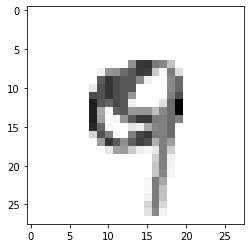

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Resources:


[1]: MINST data catelog; https://www.tensorflow.org/datasets/catalog/mnist

[2]: THE MNIST DATABASE of handwritten digits; Yann LeCun, Corinna Cortes, Christopher J.C. Burges; http://yann.lecun.com/exdb/mnist/

[3]: Understand the architecture of CNN; https://towardsdatascience.com/understand-the-architecture-of-cnn-90a25e244c7
